<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Module" data-toc-modified-id="Module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Module</a></span></li><li><span><a href="#File-Directory" data-toc-modified-id="File-Directory-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>File Directory</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#crop" data-toc-modified-id="crop-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>crop</a></span></li></ul></div>

# Module

In [250]:
import nibabel as nib
import numpy as np
import os

import matplotlib.pyplot as plt

# File Directory

In [251]:
root_dir = os.path.abspath(os.path.join(os.getcwd(),'..'))
dataset_dir = os.path.join(root_dir,'dataset')
predict_image_dir = os.path.join(root_dir,'predict_image/Trainset/Background or Not')
print('Root directory: ',root_dir)
print('Dataset directory: ',dataset_dir)
print('Predict image directory: ',predict_image_dir)

Root directory:  D:\Project\DLC\TTokDak
Dataset directory:  D:\Project\DLC\TTokDak\dataset
Predict image directory:  D:\Project\DLC\TTokDak\predict_image/Trainset/Background or Not


# Load data

In [254]:
ct0_img_nii = nib.load(dataset_dir + '/ct_img.nii')
ct0_label_nii = nib.load(dataset_dir + '/ct_label.nii')
ct0_pred_nii = nib.load(predict_image_dir + '/CT_train_pred_0.nii')

ct0_img = ct0_img_nii.get_data()
ct0_label = ct0_label_nii.get_data()
ct0_pred = ct0_pred_nii.get_data().reshape(ct0_label.shape)

In [255]:
print('ct0_img shape: ',ct0_img.shape)
print('ct0_label shape: ',ct0_label.shape)
print('ct0_pred shape: ',ct0_pred.shape)

ct0_img shape:  (128, 128, 128, 1)
ct0_label shape:  (128, 128, 128)
ct0_pred shape:  (128, 128, 128)


# crop
1. x축에서 세로로 한번
2. x축에서 가로로 한번
3. y축에서 가로로 한번 
끝

axis0 shape:  (128, 128)
axis1.shape:  (128, 128)
axis2.shape:  (128, 128)


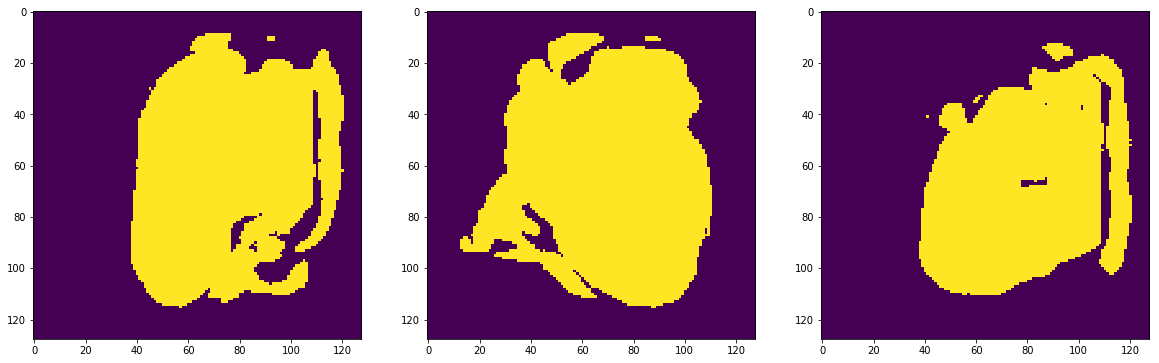

In [257]:
x_axis = np.sum(ct0_pred, axis=1)
y_axis = np.sum(ct0_pred, axis=2)
z_axis = np.sum(ct0_pred, axis=0)
print('axis0 shape: ',x_axis.shape)
print('axis1.shape: ',y_axis.shape)
print('axis2.shape: ',z_axis.shape)

x_axis[x_axis > 0] = 1 
y_axis[y_axis > 0] = 1
z_axis[z_axis > 0] = 1

f, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(x_axis)
ax[1].imshow(y_axis)
ax[2].imshow(z_axis)

In [264]:
pad = 1

In [293]:
predict_image_list = os.listdir(predict_image_dir)


for i in range(len(predict_image_list)):
    img = nib.load(predict_image_dir + '/' + predict_image_list[i]).get_data()
    
    z = np.sum(img, axis=0)
    x = np.sum(img, axis=1)
    
    x_x_idx = np.where(np.sum(x, axis=0))[0]
    z_y_idx = np.where(np.sum(z, axis=1))[0]
    x_y_idx = np.where(np.sum(x, axis=1))[0]
    
    xyz[i] = np.array([len(x_x_idx), len(z_y_idx), len(x_y_idx)], dtype=int)
    xyz01[i] = np.array([[x_y_idx[0],x_y_idx[-1]], [z_y_idx[0],z_y_idx[-1]], [x_x_idx[0],x_x_idx[-1]]], dtype=int)

In [300]:
print('가장 긴 길이: ',np.max(xyz))

가장 긴 길이:  115


In [302]:
np.mean(xyz)

82.33333333333333

In [ ]:
82 x 82 x 82

In [301]:
xyz

array([[ 83,  98, 107],
       [ 59,  65,  92],
       [ 68,  95, 100],
       [ 52,  78,  98],
       [ 56,  93,  97],
       [102, 104, 110],
       [ 82,  77,  79],
       [ 82,  88, 115],
       [ 63,  61,  79],
       [ 58,  89,  90],
       [ 71,  74, 103],
       [ 84, 100, 107],
       [ 85,  88, 108],
       [ 61,  82,  98],
       [ 52,  78,  98],
       [ 68,  68,  83],
       [ 72,  76, 100],
       [ 55,  74,  79],
       [ 65,  82,  85],
       [ 59,  76,  89]])

In [295]:
xyz01[0]

array([[  9, 115],
       [ 13, 110],
       [ 38, 120]])

In [296]:
crop_img = ct0_pred[xyz01[0][0][0]-pad:xyz01[0][0][1]+pad+1,
                    xyz01[0][1][0]-pad:xyz01[0][1][1]+pad+1,
                    xyz01[0][2][0]-pad:xyz01[0][2][1]+pad+1]
crop_img.shape

(109, 100, 85)

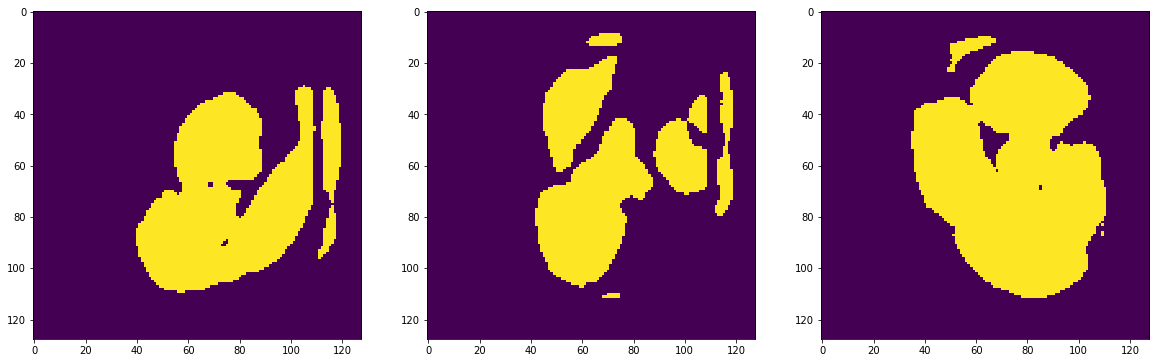

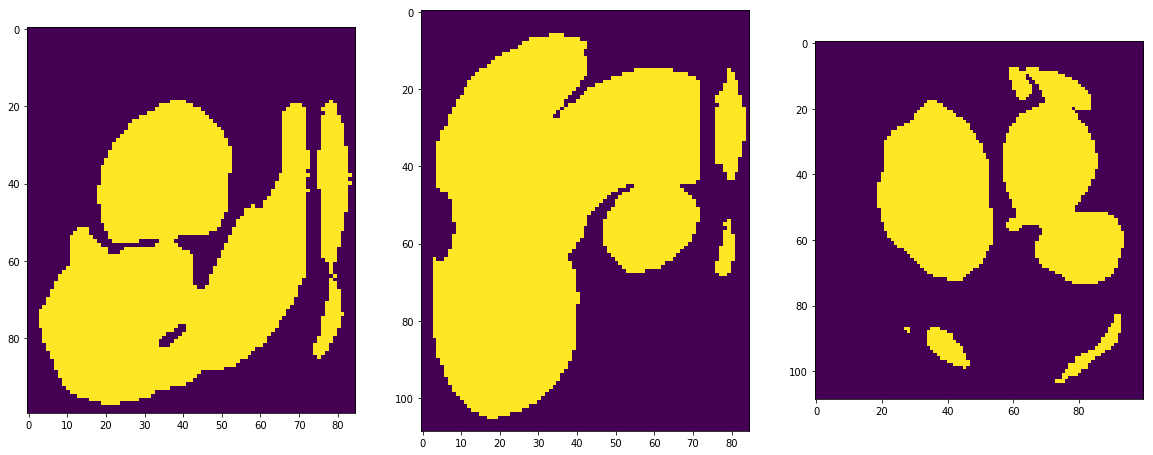

In [298]:
f, ax = plt.subplots(1,3, figsize=(20,10))
ax[0].imshow(ct0_pred[64,:,:])
ax[1].imshow(ct0_pred[:,64,:])
ax[2].imshow(ct0_pred[:,:,64])
plt.show()

f, ax = plt.subplots(1,3, figsize=(20,10))
ax[0].imshow(crop_img[54,:,:])
ax[1].imshow(crop_img[:,64,:])
ax[2].imshow(crop_img[:,:,42])
plt.show()